In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

### importing CSV file

In [2]:
df=pd.read_csv('data/stud.csv')

In [3]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
df.shape

(1000, 8)

### Data Ckecks to perform
-> missing values
->Duplicates
->Data Types
->number of unique values
->Statistic of data sets
->various catagories present in the different Catagorical column


In [5]:
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [9]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [10]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [15]:
print("catagories in 'gender' variabe:  ",end=' ')
print(df['gender'].unique())

print("catagories in 'race' variabe:  ",end=' ')
print(df['race_ethnicity'].unique())

print("catagories in 'perental_level_of_education' variabe:  ",end=' ')
print(df['parental_level_of_education'].unique())

print("catagories in 'test preparation course' variabe:  ",end=' ')
print(df['test_preparation_course'].unique())

catagories in 'gender' variabe:   ['female' 'male']
catagories in 'race' variabe:   ['group B' 'group C' 'group A' 'group D' 'group E']
catagories in 'perental_level_of_education' variabe:   ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
catagories in 'test preparation course' variabe:   ['none' 'completed']


In [16]:
#define numeric & categorical columns
numeric_features=[feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features=[feature for feature in df.columns if df[feature].dtype == 'O']

#print columns
print('We have {} numerical features: {}'.format(len(numeric_features),numeric_features))
print('We have {} categorical features: {}'.format(len(categorical_features),categorical_features))

We have 3 numerical features: ['math_score', 'reading_score', 'writing_score']
We have 5 categorical features: ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


#### Adding columns for "Total Score" and "Average"

In [18]:
df['total_score']=df['math_score']+df['reading_score']+df['writing_score']
df['average']=df['total_score']/3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [23]:
reading_full=df[df['reading_score']==100]['average'].count()
writing_full=df[df['writing_score']==100]['average'].count()
math_full=df[df['math_score']==100]['average'].count()

print(f"reading={reading_full},writing={writing_full},reading={math_full}")

reading=17,writing=14,reading=7


In [26]:
reading_less_20=df[df['reading_score'] <= 20]['average'].count()
writing_less_20=df[df['writing_score'] <= 20]['average'].count()
math_less_20=df[df['math_score'] <= 20]['average'].count()

print(f"reading_less={reading_less_20},writing_less={writing_less_20},math_less={math_less_20}")

reading_less=1,writing_less=3,math_less=4


### Insights
from above we can say students have performed the worst in maths
beest performance is in the reading section

## Visulization

histograme and KDE(Kernel Distribution Function)

<Axes: xlabel='average', ylabel='Count'>

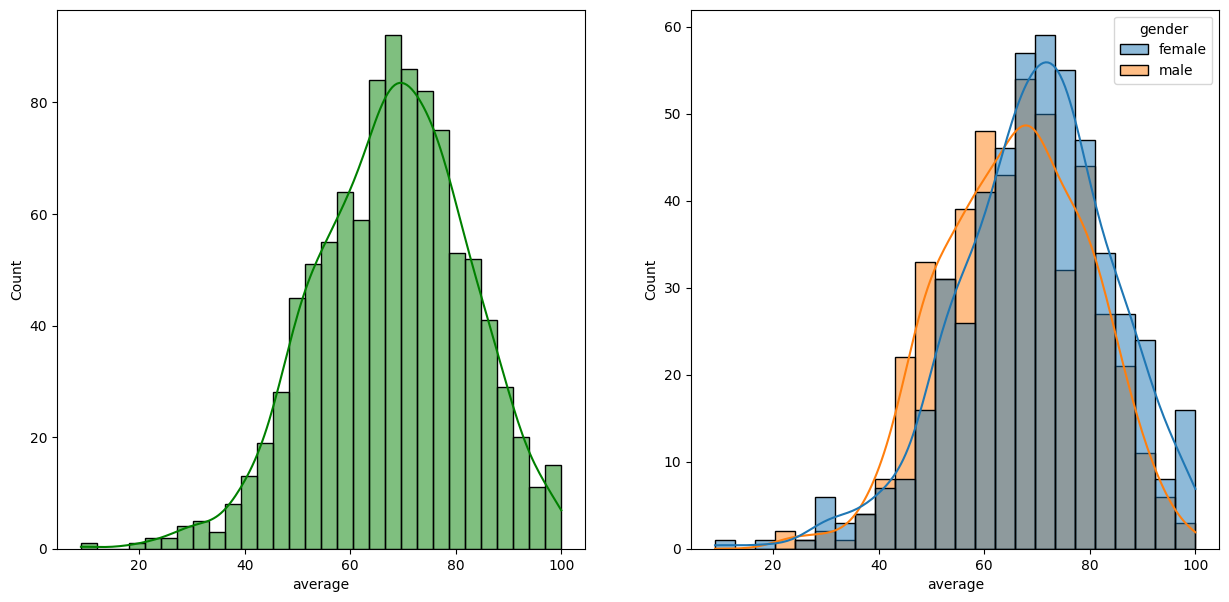

In [34]:
fig, axs =plt.subplots(1, 2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df, x='average', bins=30, kde=True, color='g')
plt.subplot(122)
sns.histplot(data=df, x='average', kde =True,hue='gender')


<Axes: xlabel='total_score', ylabel='Count'>

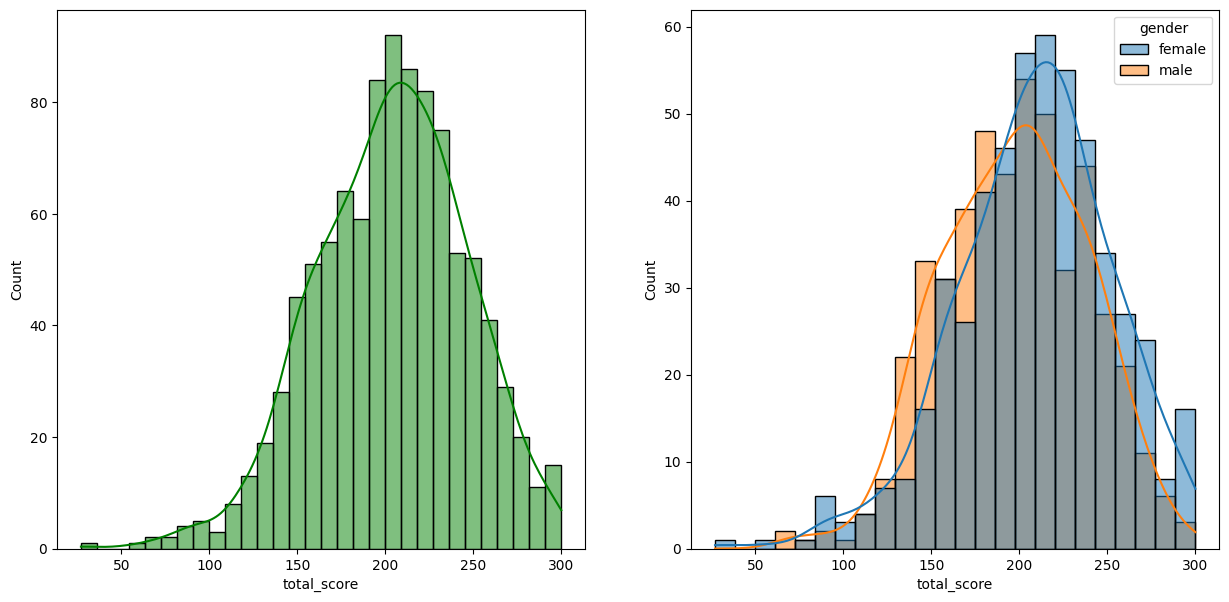

In [35]:
fig, axs =plt.subplots(1, 2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df, x='total_score', bins=30, kde=True, color='g')
plt.subplot(122)
sns.histplot(data=df, x='total_score', kde =True,hue='gender')


female students tends to perform well then male students

<Axes: xlabel='average', ylabel='Count'>

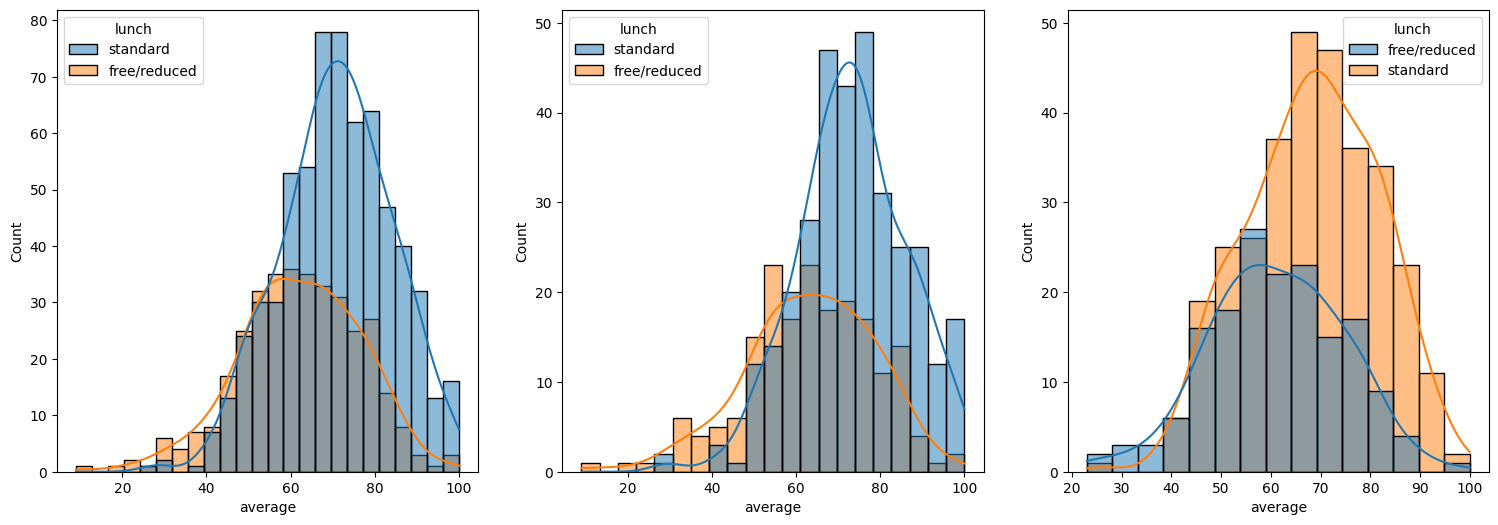

In [38]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df, x='average', hue='lunch' ,kde=True)
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x ='average', kde=True, hue='lunch')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x ='average', kde=True, hue='lunch')

Insights

->standard lunch helps perform well in exams.
->standard lunch helps for both male in female.

<Axes: xlabel='average', ylabel='Count'>

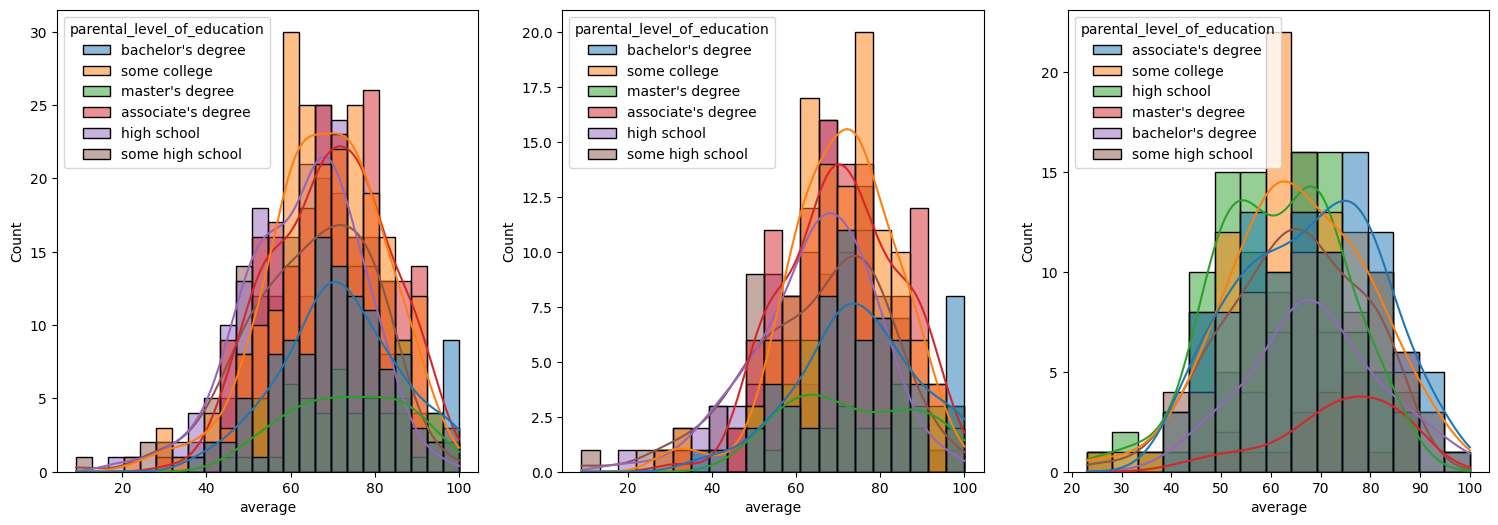

In [39]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df, x='average', hue='parental_level_of_education' ,kde=True)
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x ='average', kde=True, hue='parental_level_of_education')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x ='average', kde=True, hue='parental_level_of_education')

Insights

-> in general parents education don't help student perform well in exam

->second graph says whose perents have associates degree their male childrens performing well in tha exams.

-> no effect in female students


<Axes: xlabel='average', ylabel='Count'>

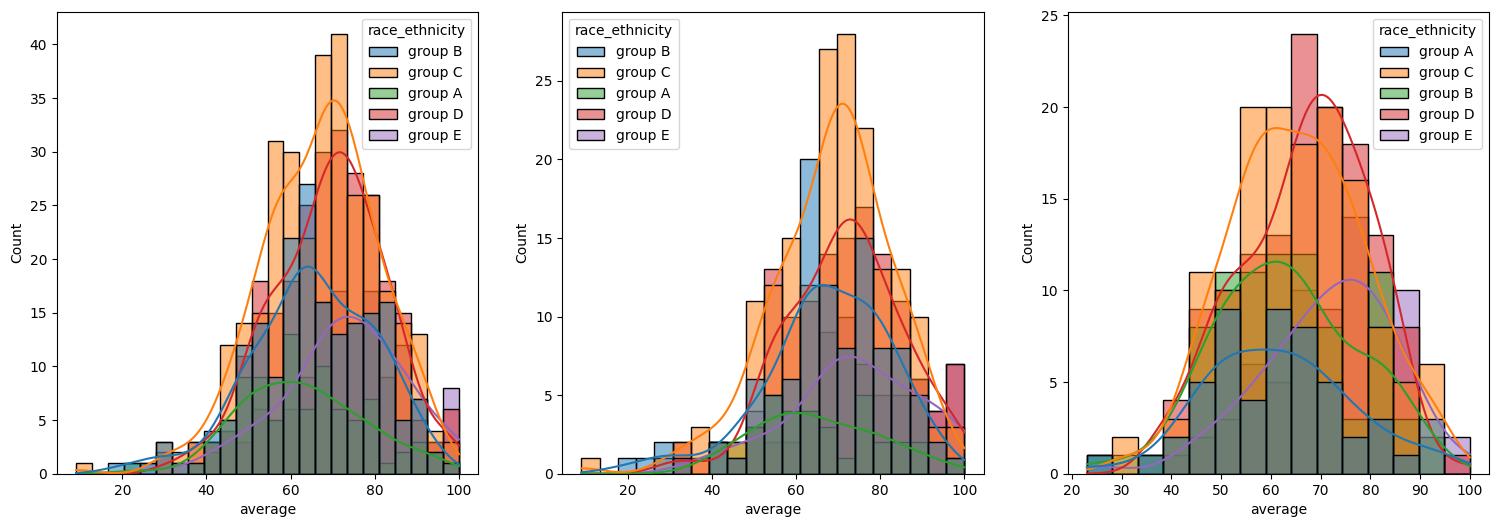

In [41]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df, x='average', hue='race_ethnicity' ,kde=True)
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x ='average', kde=True, hue='race_ethnicity')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x ='average', kde=True, hue='race_ethnicity')

Students group A and Grup B tends to perform poorly in exams

## Maximum score of students in all three subjects

<Axes: title={'center': 'Writing Scores'}, ylabel='writing_score'>

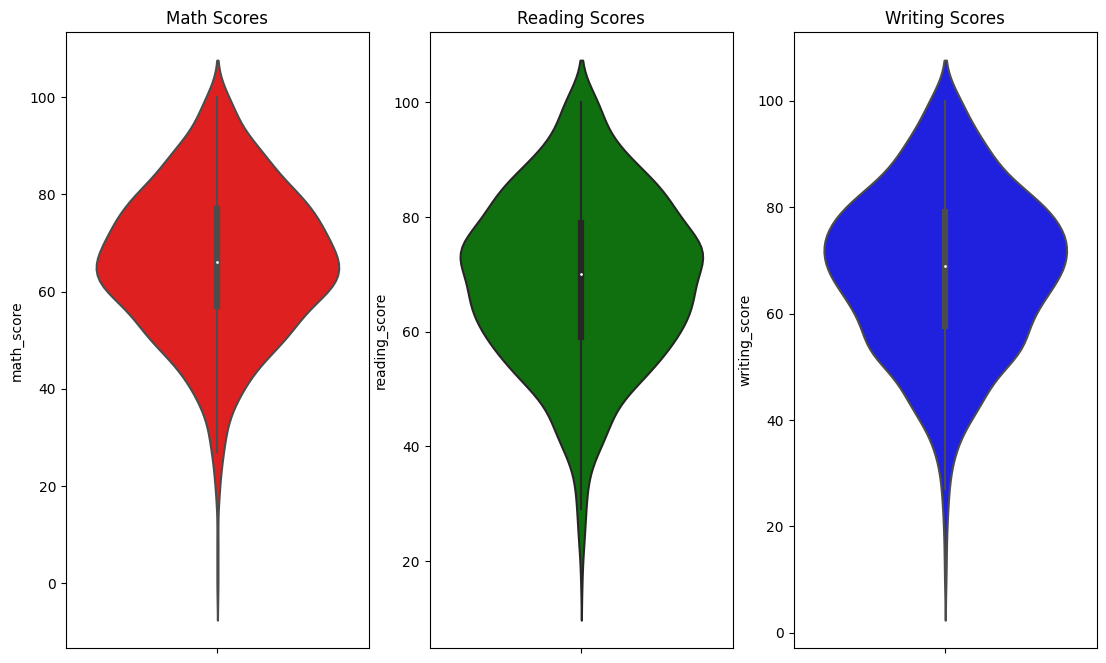

In [44]:
plt.figure(figsize=(18,8))
plt.subplot(1,4,1)
plt.title('Math Scores')
sns.violinplot(y='math_score',data=df,color='red')
plt.subplot(1,4,2)
plt.title('Reading Scores')
sns.violinplot(y='reading_score',data=df,color='green')
plt.subplot(1,4,3)
plt.title('Writing Scores')
sns.violinplot(y='writing_score',data=df,color='blue')

## Multivariate analysis using pieplot

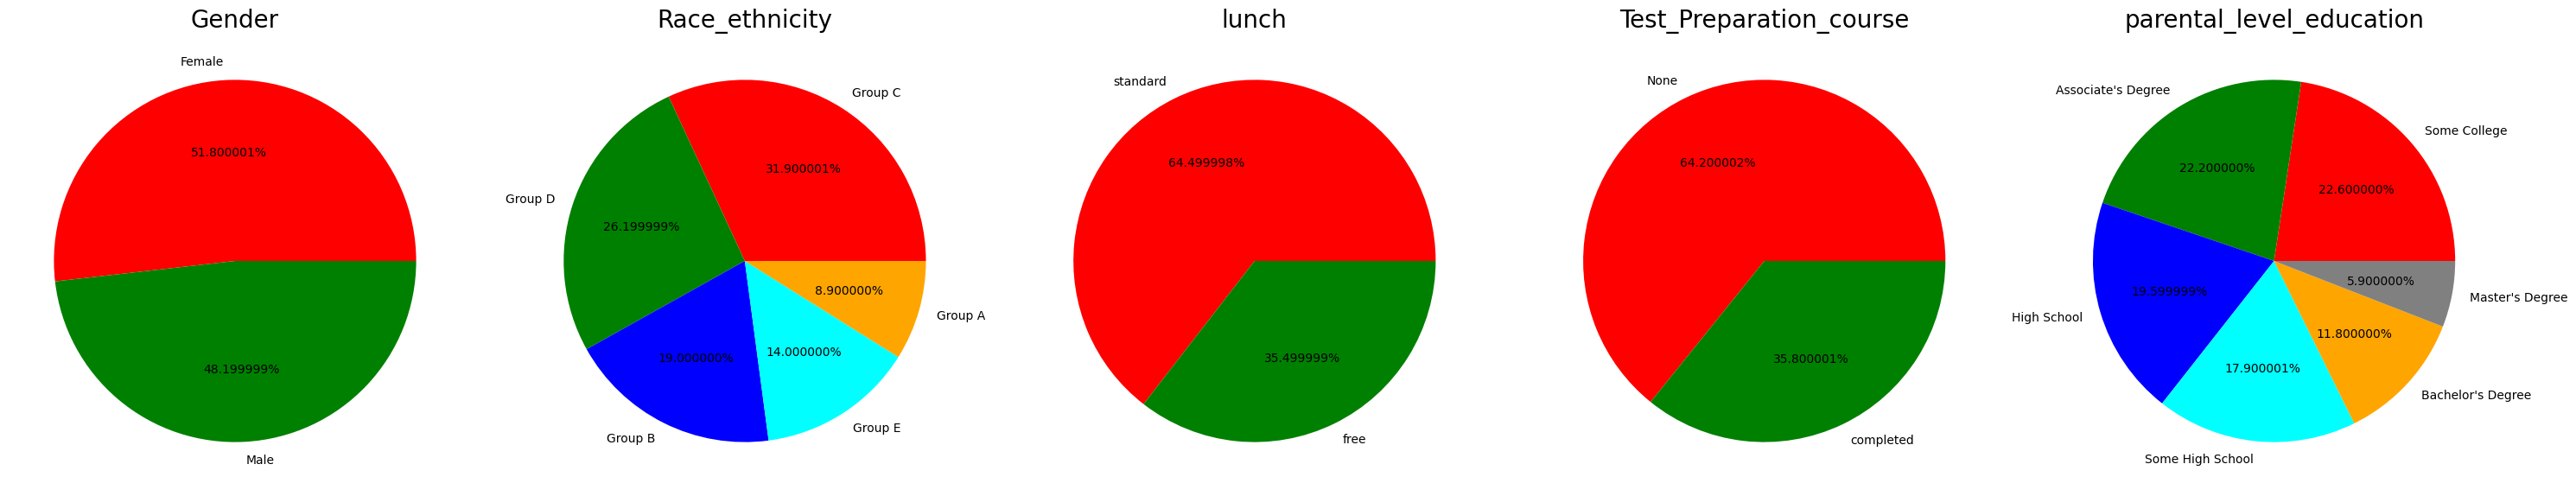

In [49]:
plt.rcParams['figure.figsize']=(30,12)

plt.subplot(1,5,1)
size=df['gender'].value_counts()
labels='Female', 'Male'
color=['red','green']

plt.pie(size,colors=color, labels= labels , autopct='%2f%%')
plt.title('Gender', fontsize=20)
plt.axis('off')

plt.subplot(1,5,2)
size=df['race_ethnicity'].value_counts()
labels='Group C','Group D','Group B','Group E',"Group A"
color=['red','green','blue','cyan','orange']

plt.pie(size,colors=color,labels=labels,autopct='%2f%%')
plt.title('Race_ethnicity', fontsize=20)
plt.axis('off')

plt.subplot(1,5,3)
size=df['lunch'].value_counts()
labels='standard',"free"
color=['red','green']

plt.pie(size,colors=color,labels=labels,autopct='%2f%%')
plt.title('lunch', fontsize=20)
plt.axis('off')

plt.subplot(1,5,4)
size=df['test_preparation_course'].value_counts()
labels='None',"completed"
color=['red','green']

plt.pie(size,colors=color,labels=labels,autopct='%2f%%')
plt.title('Test_Preparation_course', fontsize=20)
plt.axis('off')

plt.subplot(1,5,5)
size=df['parental_level_of_education'].value_counts()
labels='Some College',"Associate's Degree",'High School','Some High School',"Bachelor's Degree", "Master's Degree"
color=['red','green','Blue',"cyan","orange","grey"]

plt.pie(size,colors=color,labels=labels, autopct='%2f%%')
plt.title('parental_level_education', fontsize=20)
plt.axis('off')

plt.tight_layout()
plt.grid()

plt.show()

## Univariate Analysis

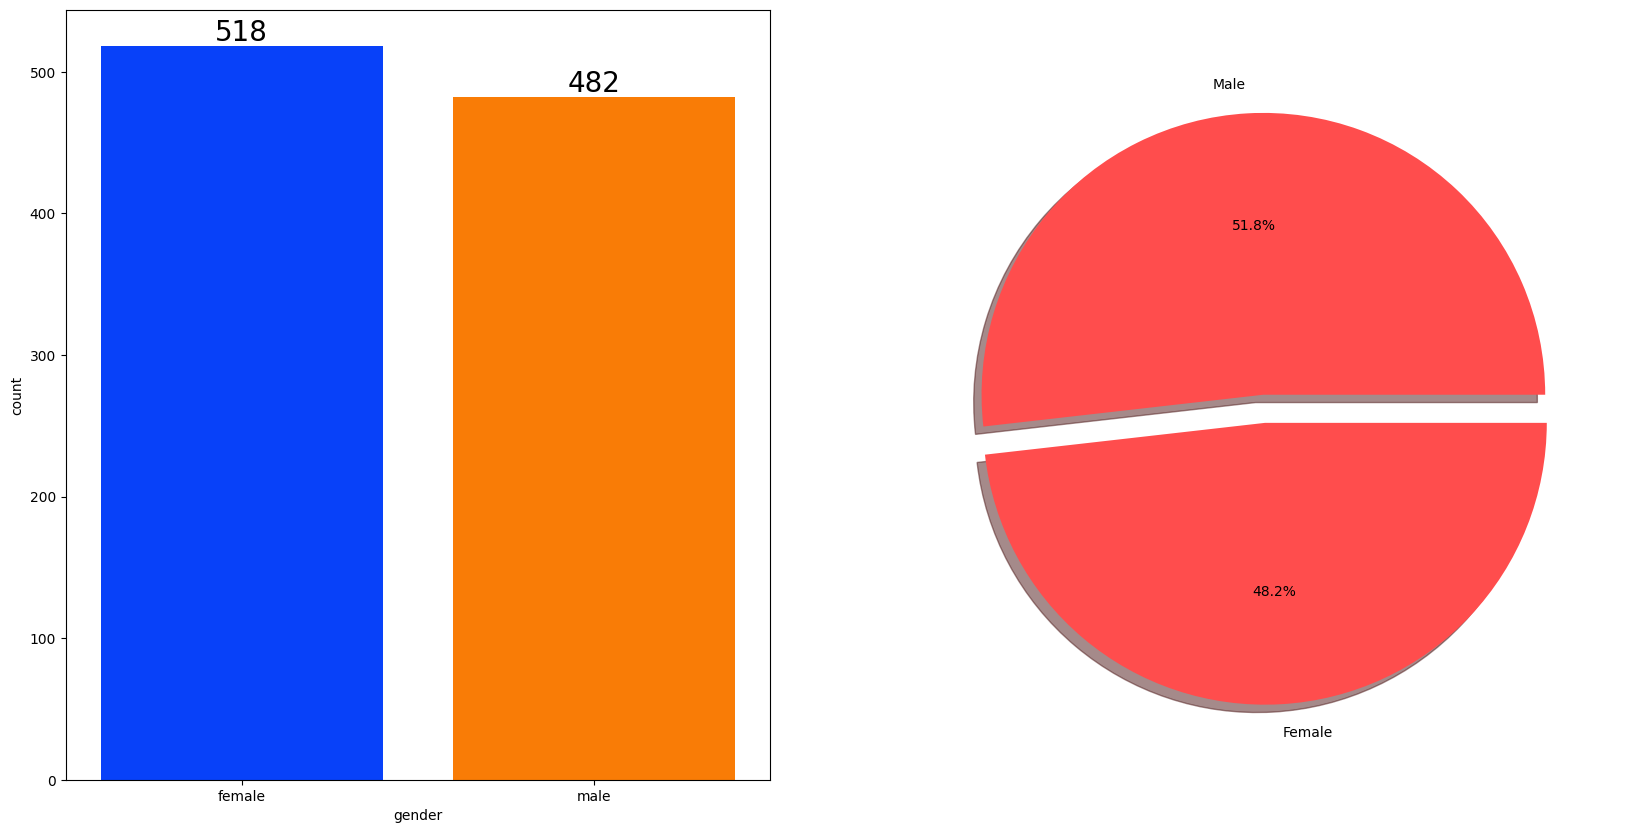

In [52]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['gender'],data=df, palette='bright',ax=ax[0], saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black', size=20)

plt.pie(x=df['gender'].value_counts(),labels=['Male','Female'], explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d'])
plt.show()